# Solutions 2: Exploratory Analysis of Bayesian models

In [1]:
import numpy as np
import pymc3 as pm
import arviz as az
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
az.style.use("arviz-darkgrid")
np.random.seed(521)
rng = np.random.RandomState(2021)

viridish = [(0.2823529411764706, 0.11372549019607843, 0.43529411764705883, 1.0),
            (0.1450980392156863, 0.6705882352941176, 0.5098039215686274, 1.0),
            (0.6901960784313725, 0.8666666666666667, 0.1843137254901961, 1.0)]

### 2E1
Using your own words, what are the main differences between prior predictive checks and posterior predictive checks? How are these empirical evaluations related to Equations (1.7) and (1.8).

Prior predictive checks primarily assess the plausibility of parameters prior to seeing the data at hand. They do this through generating samples of what we *think* will be observed, as encoded in our model. We can then compare these samples with our domain knowledge to note any discrepancies. Additionally, prior predictive checks are useful in computational Bayesian statistics to ensure models syntax is correct, e.g. no shape issues etc, and models are semantically correct, we wrote the intended model.

Posterior predictive samples are predictions from our model, i.e. what we think will be observed. We can compare the posterior predictive values with the observed data to note any discrepancies.


These relate to Equations 1.7 and 1.8 in that the equations are the definition of the prior predictive and posterior predictive distributions. We base prior/posterior predictive checks on the ability to compute those distributions.

### 2E2
Using your own words explain: ESS, $\hat R$ and MCSE. Focus your explanation on what these quantities are measuring and what potential issue with MCMC they are identifying.

ESS is measuring the number of effective samples in the MCMC chain by assessing the autocorrelation between samples. Highly autocorrelated chains will tend to have less information about the posterior distribution than lesser autocorrelated chains

$\hat R$ measures the ratio of in-chain variance versus the between-chain variance for all chains. If the between-chain variance tends to be close to the in-chain variance we can be more confident that the chains have converged to the same posterior distribution. If the $\hat R$ value is high, then we know that the chains have likely not converged and that the samples may be biased. In practice we used the value 1.01 as the cutoff value

MCSE is an estimate of the inaccuracy of Monte Carlo samples. Recall that MCMC, for any finite sample, is an approximation, so MCSE helps quantify the error introduced by that approximation, given there were no sampling issues indicated by ESS or $\hat R$

### 2E3 Reword
ArviZ includes precomputed InferenceData objects for a few models. We are going to load an InferenceData object generated from a classical example in Bayesian statistic, the eight schools model. The InferenceData object includes prior samples, prior predictive samples and posterior samples. We can load the InferenceData object using the command az.load_arviz_data("centered_eight"). Use ArviZ to:



a. List all the groups available on the InferenceData object.

b. Identify the number of chains and the total number of posterior samples.

c. Plot the posterior.

d. Plot the posterior predictive distribution.

e. Calculate the estimated mean of the parameters, and the Highest Density Intervals.


In [3]:
eight_schools_inf_data = az.load_arviz_data("centered_eight")

#### Solution a
When working with jupyter notebook we can get a hmtl-pretty-print justby doing:

In [4]:
eight_schools_inf_data

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> prior
	> observed_data

And we can also get the group names as a list of strings

In [5]:
eight_schools_inf_data.groups()

['posterior', 'posterior_predictive', 'sample_stats', 'prior', 'observed_data']

#### Solution b
The chains and draws are listed as `(chain: 4, draw: 500, school: 8)`

In [6]:
eight_schools_inf_data.posterior

<xarray.Dataset>
Dimensions:  (chain: 4, draw: 500, school: 8)
Coordinates:
  * chain    (chain) int64 0 1 2 3
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 492 493 494 495 496 497 498 499
  * school   (school) object 'Choate' 'Deerfield' ... "St. Paul's" 'Mt. Hermon'
Data variables:
    mu       (chain, draw) float64 -3.477 -2.456 -2.826 ... 4.597 5.899 0.1614
    theta    (chain, draw, school) float64 1.669 -8.537 -2.623 ... 10.59 4.523
    tau      (chain, draw) float64 3.73 2.075 3.703 4.146 ... 8.346 7.711 5.407
Attributes:
    created_at:                 2019-06-21T17:36:34.398087
    inference_library:          pymc3
    inference_library_version:  3.7

One way to get the number of samples is:

In [7]:
len(eight_schools_inf_data.posterior.chain) *  len(eight_schools_inf_data.posterior.draw) 

2000

#### Solution c

There are many ways to represent the posterior, one is

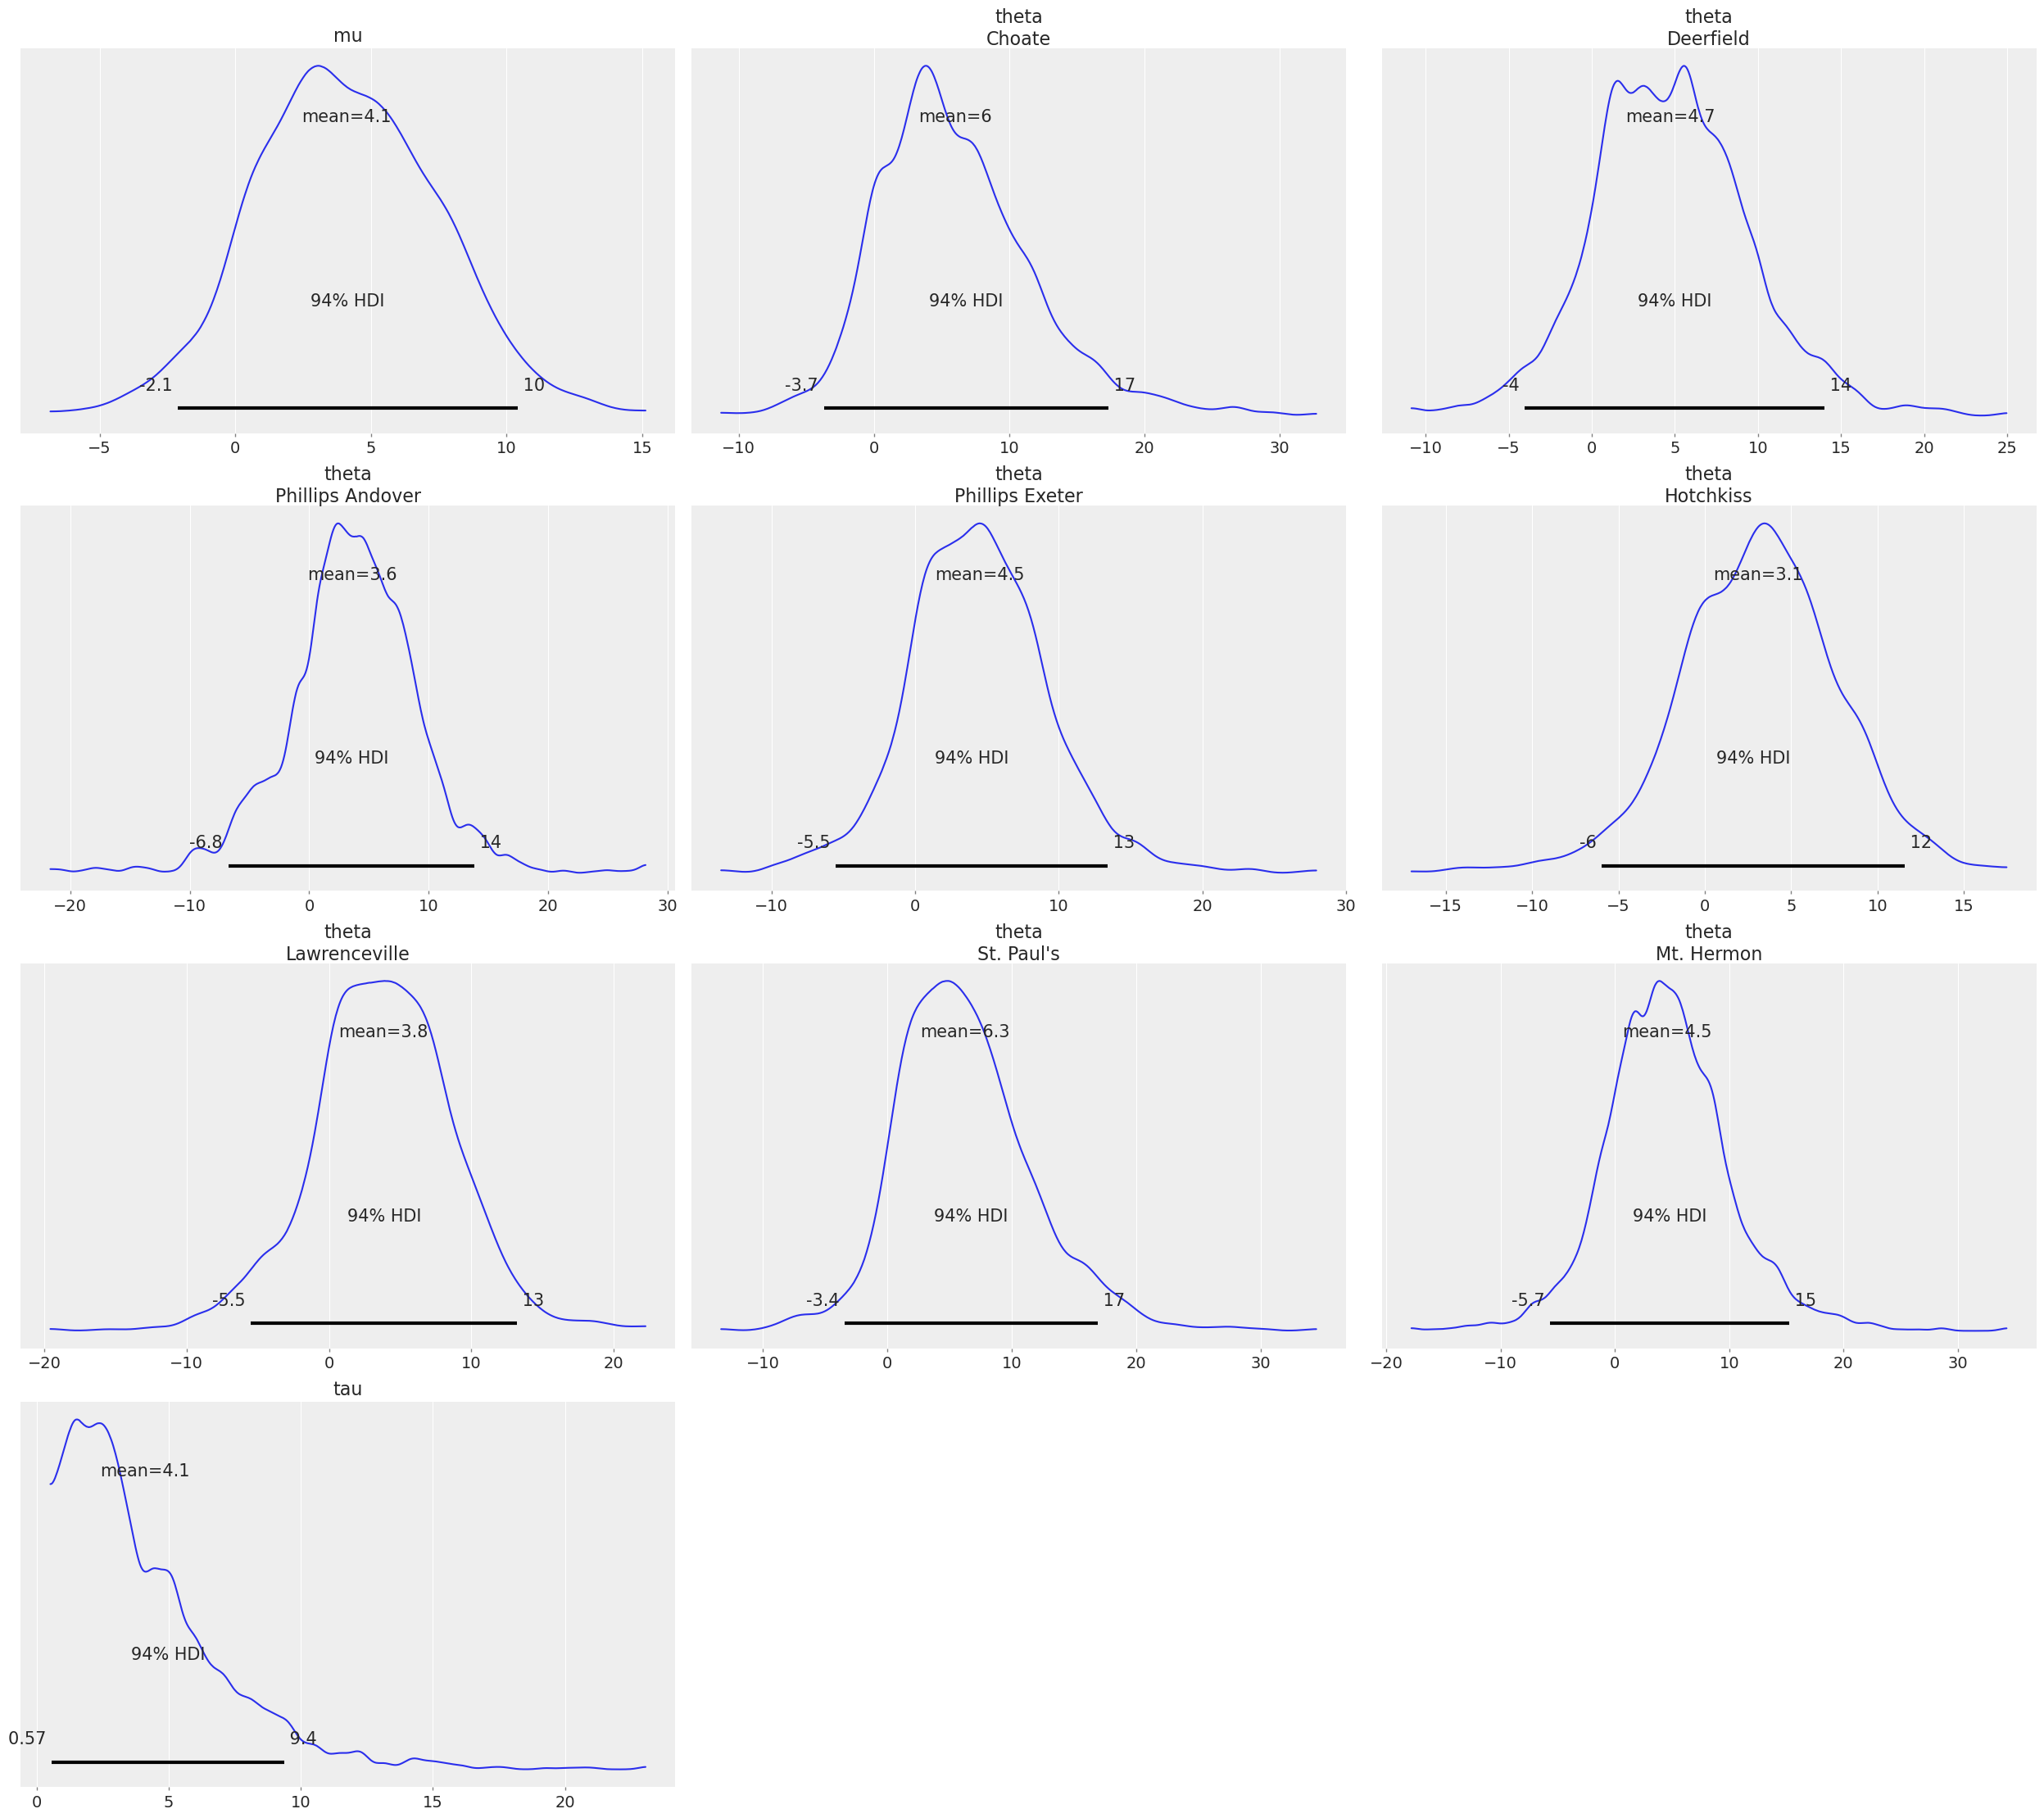

In [8]:
az.plot_posterior(eight_schools_inf_data);

#### Solution D

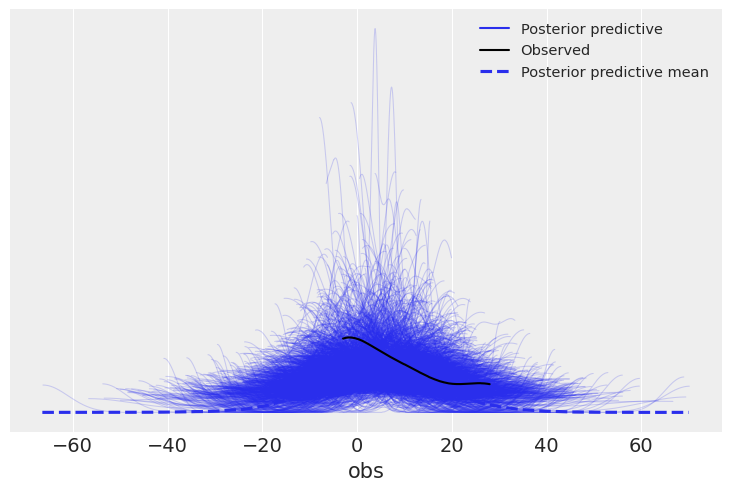

In [9]:
az.plot_ppc(eight_schools_inf_data);

#### Solution e

We can call summary, and optionally subset the resulting dataframe to display just the needed information

In [10]:
az.summary(eight_schools_inf_data)[["mean", "hdi_3%", "hdi_97%"]]

,mean,hdi_3%,hdi_97%
mu,4.093,-2.118,10.403
theta[0],6.026,-3.707,17.337
theta[1],4.724,-4.039,13.999
theta[2],3.576,-6.779,13.838
theta[3],4.478,-5.528,13.392
theta[4],3.064,-5.972,11.547
theta[5],3.821,-5.507,13.232
theta[6],6.250,-3.412,16.920
theta[7],4.544,-5.665,15.266
tau,4.089,0.569,9.386


We can call also pass a dictionary with names and function to `az.summary` like this:

In [11]:
func_dict = {"mean": np.mean,
              "hdi_3%": lambda x: az.hdi(x)[0],
              "hdi_97%": lambda x: az.hdi(x)[1],
             }

az.summary(eight_schools_inf_data, extend=False, stat_funcs=func_dict)

,mean,hdi_3%,hdi_97%
mu,4.093,-2.118,10.403
theta[0],6.026,-3.707,17.337
theta[1],4.724,-4.039,13.999
theta[2],3.576,-6.779,13.838
theta[3],4.478,-5.528,13.392
theta[4],3.064,-5.972,11.547
theta[5],3.821,-5.507,13.232
theta[6],6.250,-3.412,16.920
theta[7],4.544,-5.665,15.266
tau,4.089,0.569,9.386


### 2E4

Load az.load_arviz_data("non_centered_eight"), which is a reparametrized version of the “centered_eight” model in the previous exercise. Use ArviZ to assess the MCMC sampling convergence for both models by using:



a. Autocorrelation plots

b. Rank plots

c. $\hat R$ values


Focus on the plots for the mu and tau parameters. What do these three different diagnostics show? Compare these to the InferenceData results loaded from az.load_arviz_data("centered_eight"). Do all three diagnostics tend to agree on which model is preferred? Which one of the models has better convergence diagnostics?

In [12]:
non_centered = az.load_arviz_data("non_centered_eight")

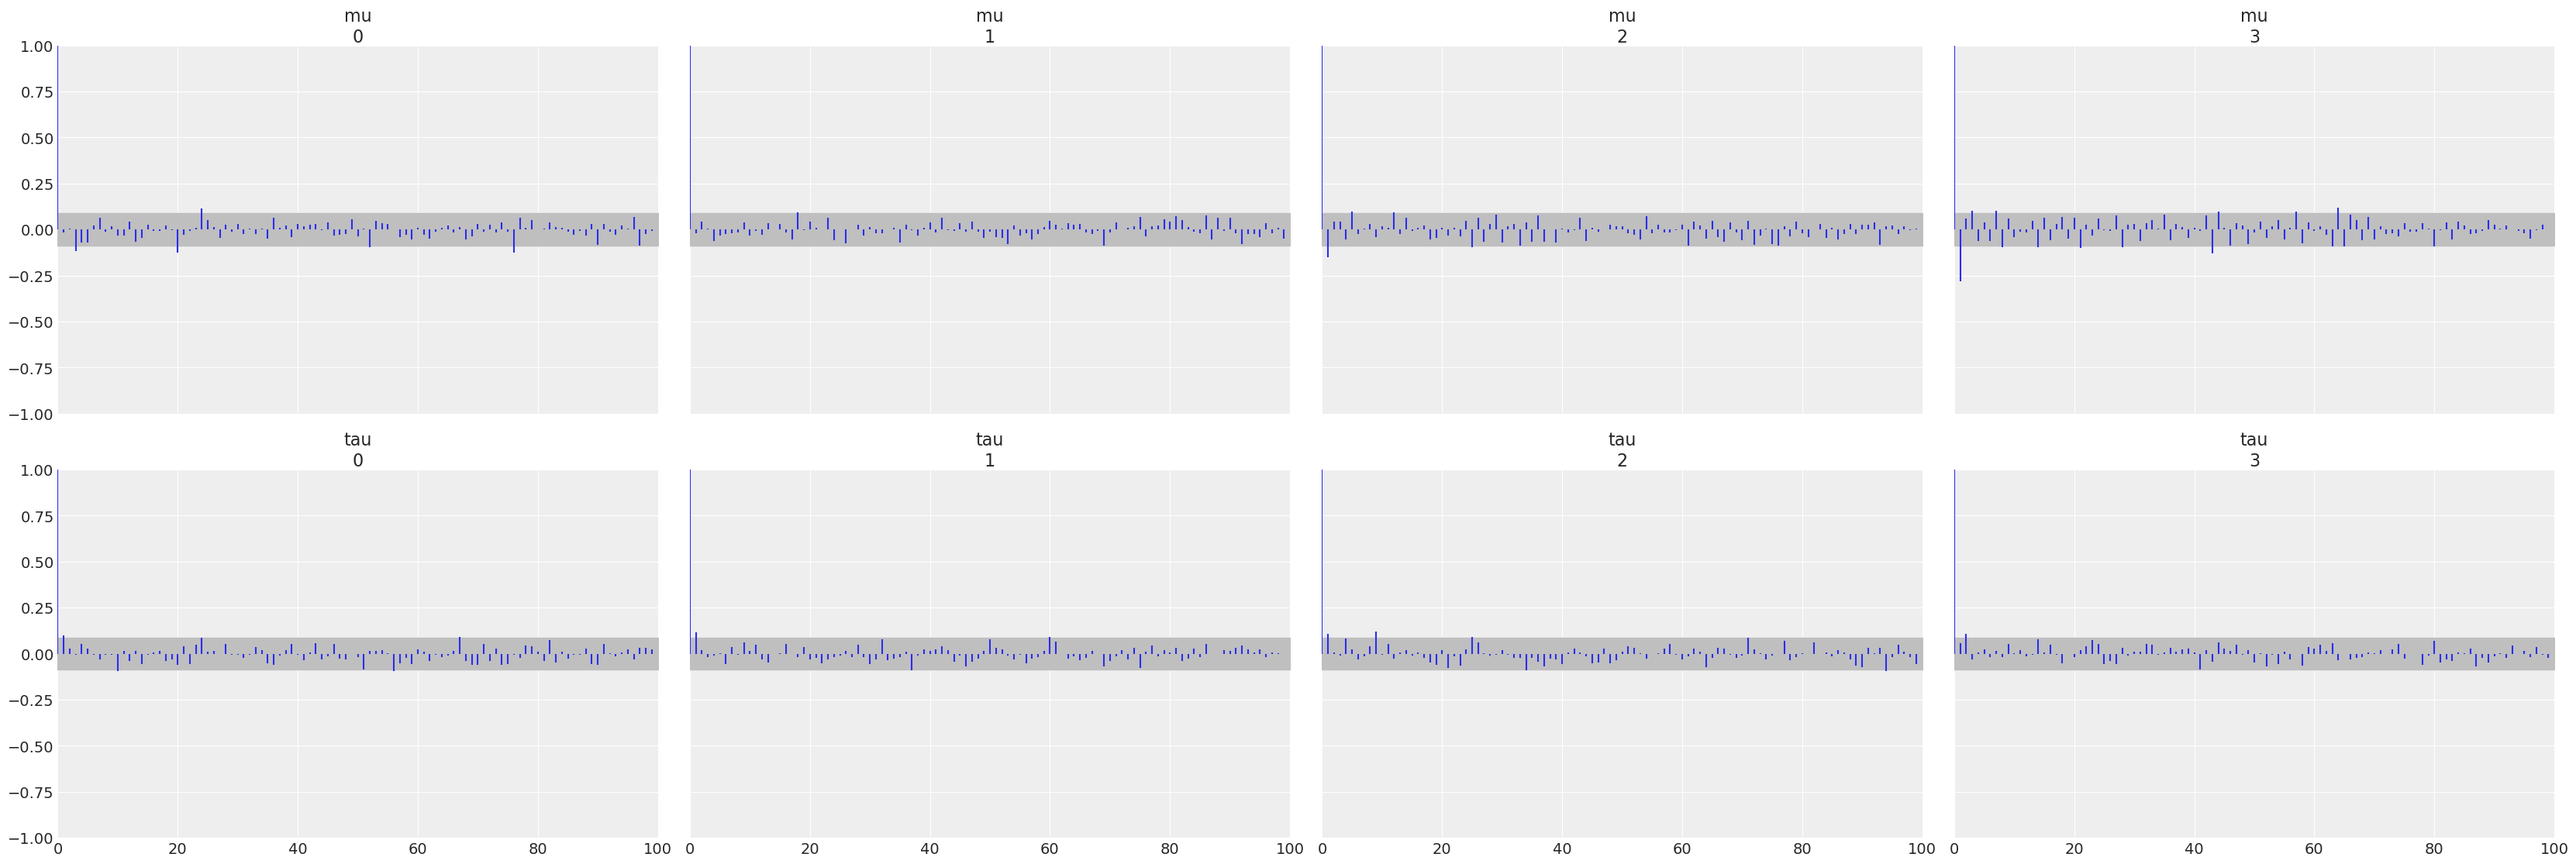

In [13]:
az.plot_autocorr(non_centered, var_names=["mu", "tau"]);

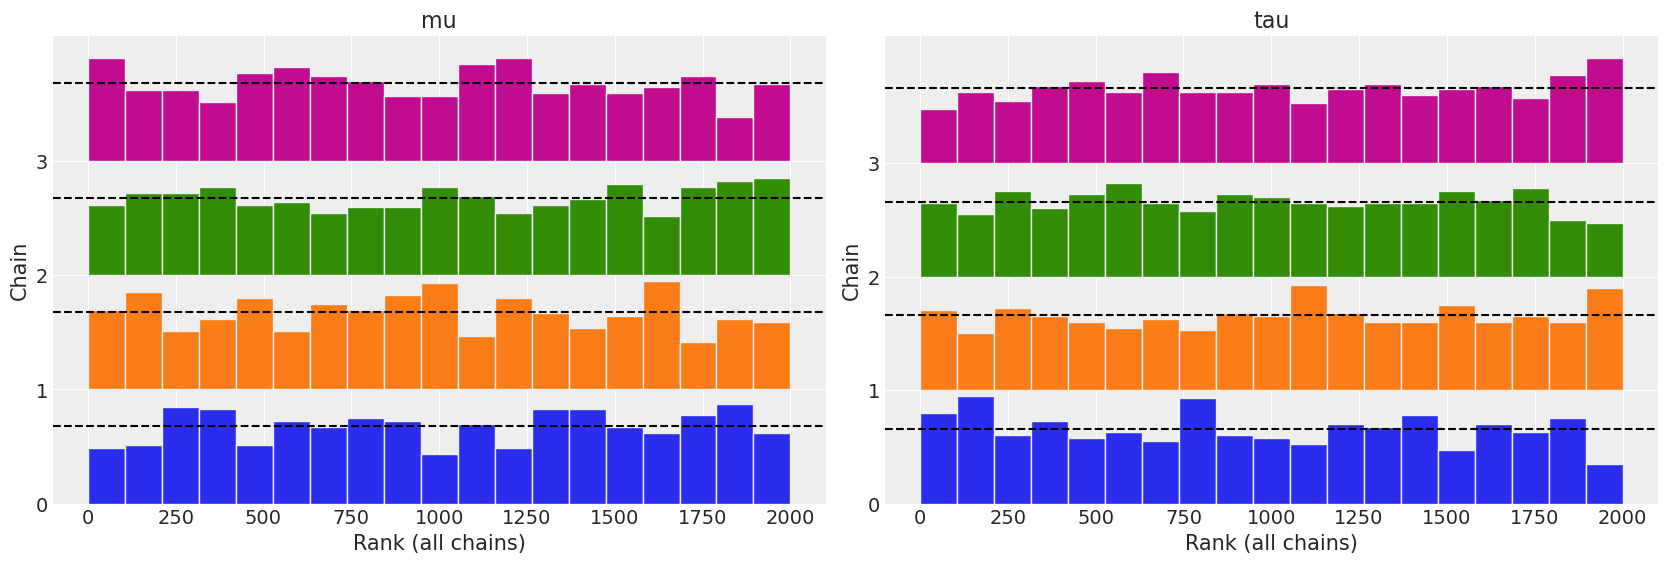

In [14]:
az.plot_rank(non_centered, var_names=["mu", "tau"]);

In [15]:
az.rhat(non_centered, var_names=["mu", "tau"])

<xarray.Dataset>
Dimensions:  ()
Data variables:
    mu       float64 1.0
    tau      float64 1.001

In [16]:
centered = az.load_arviz_data("centered_eight")

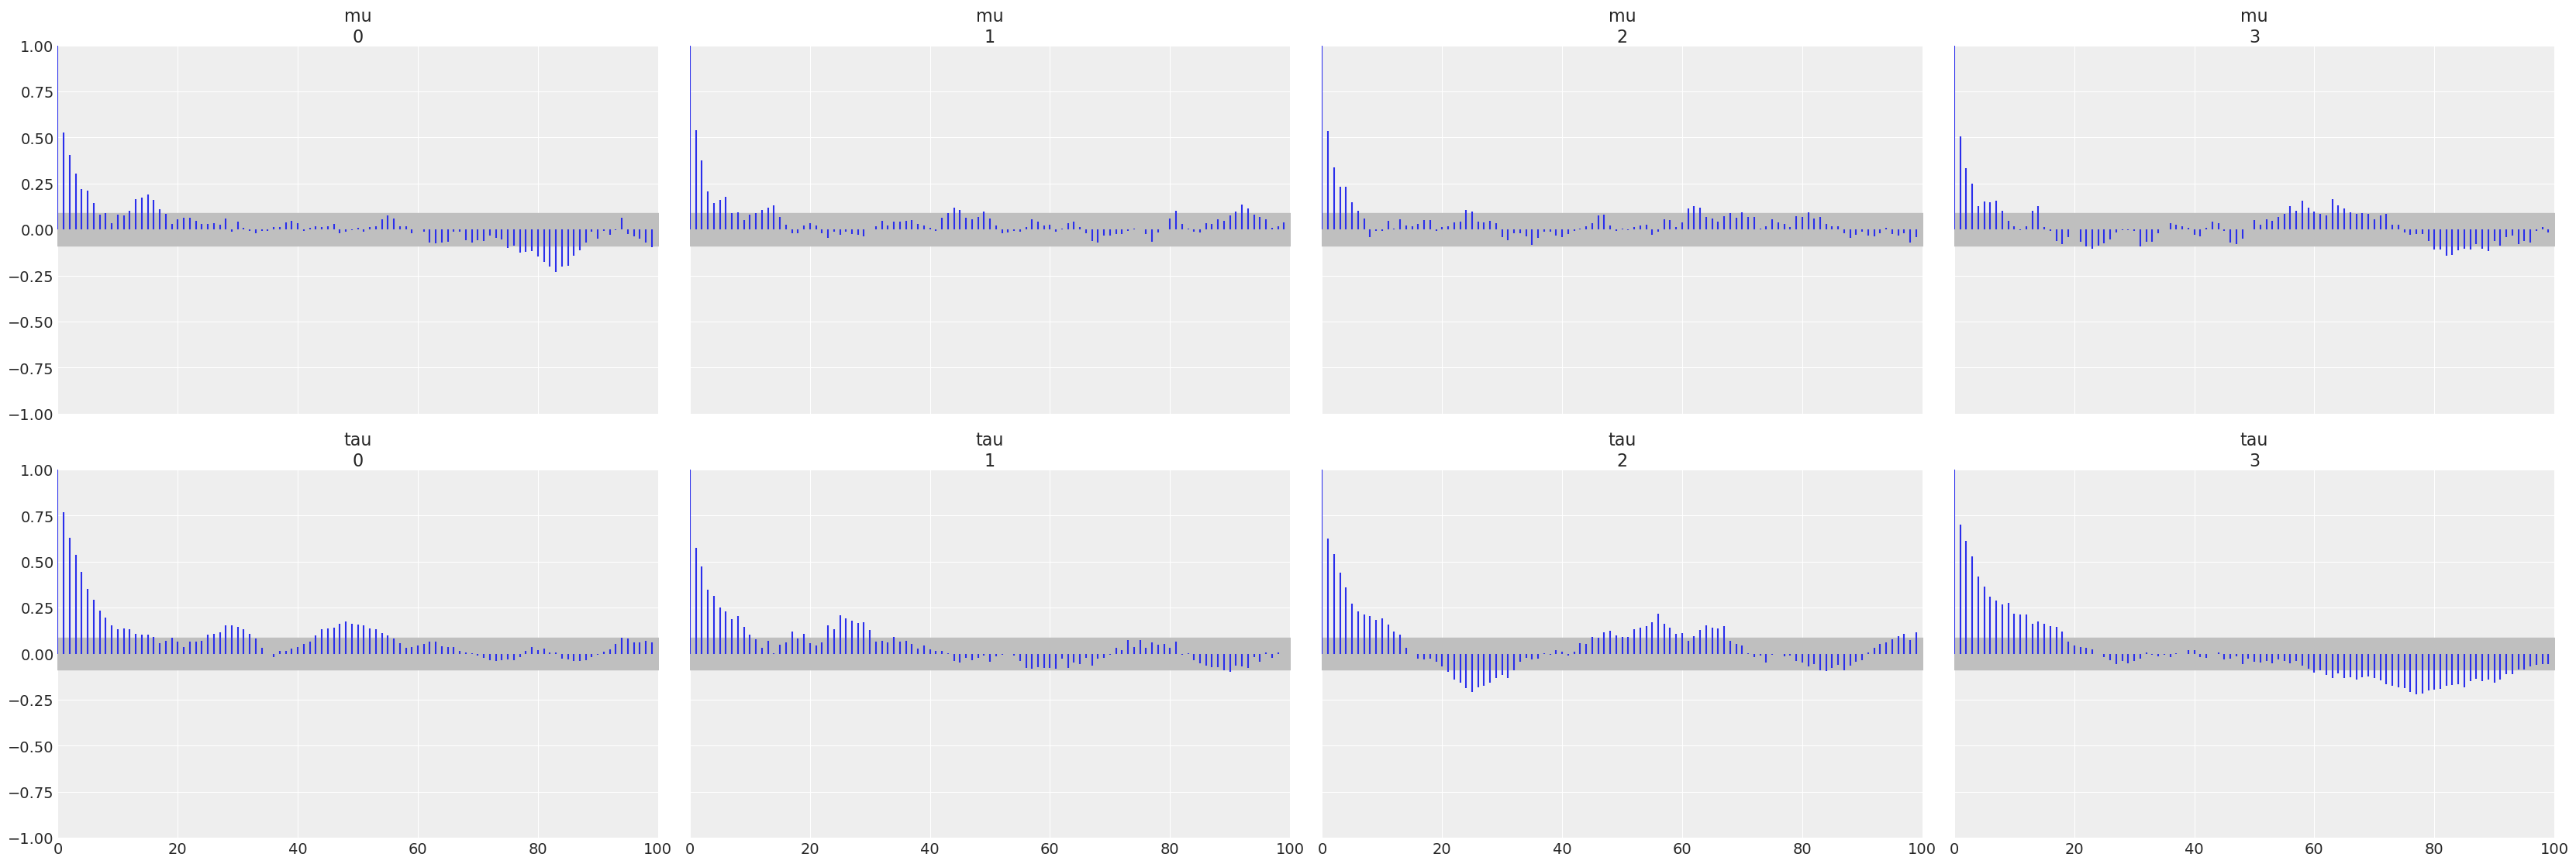

In [17]:
az.plot_autocorr(centered, var_names=["mu", "tau"]);

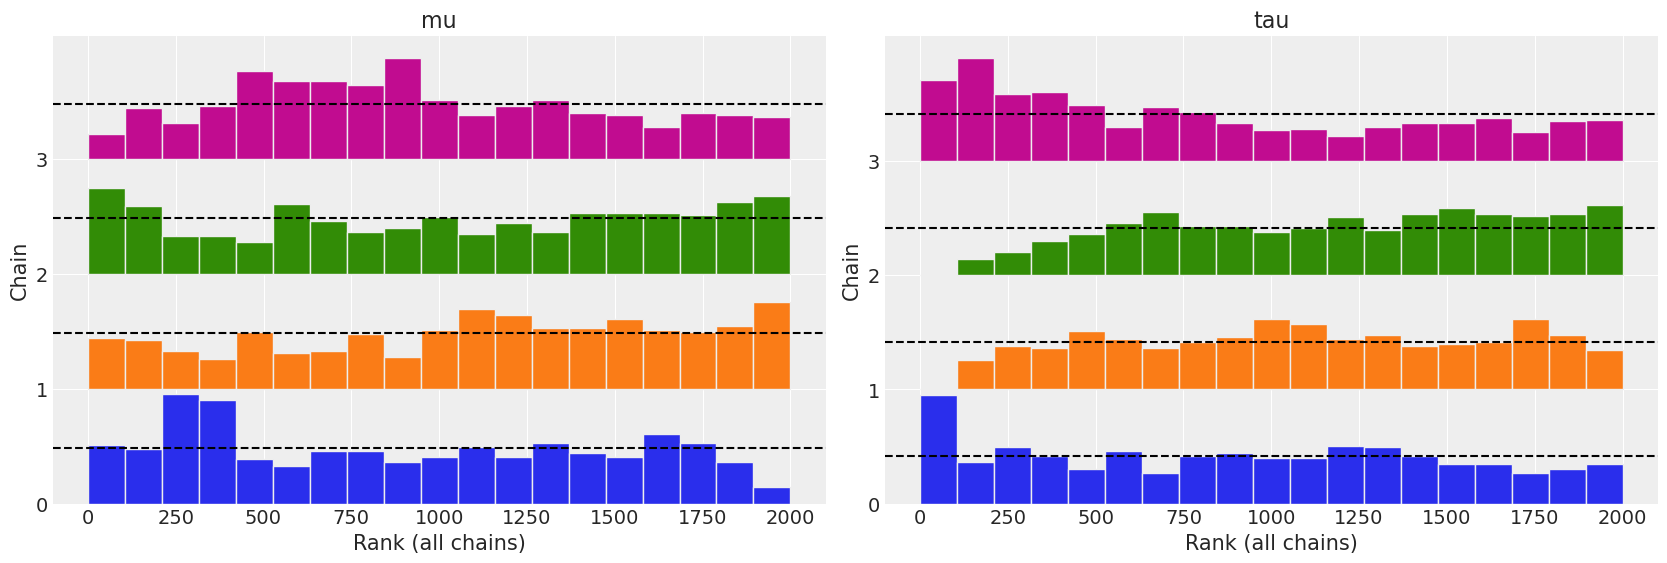

In [18]:
az.plot_rank(centered, var_names=["mu", "tau"]);

In [19]:
az.rhat(centered, var_names=["mu", "tau"])

<xarray.Dataset>
Dimensions:  ()
Data variables:
    mu       float64 1.027
    tau      float64 1.071

All three diagnostics tend to indicate the non centered model is preferred. The autocorrelation plots show a faster reduction to zero, rank plots are more uniform, and the $\hat R$ values are closer to 1.

### 2E5

InferenceData object can store statistics related to the sampling algorithm. You will find them in the sample_stats group, including divergences (diverging):

a. Count the number of divergences for “centered_eight” and “non_centered_eight” models.

b. Use `az.plot_parallel` to identify where the divergences tend to concentrate in the parameter space.

The divergences can be counted by accessing the divergences boolean array in the `sample_stats` group. They can be counted using a sum

In [20]:
centered.sample_stats.diverging.sum()

<xarray.DataArray 'diverging' ()>
array(43)

In [21]:
non_centered.sample_stats["diverging"].sum()

<xarray.DataArray 'diverging' ()>
array(2)

The divergences tend to concentrate around tau=0. The reason for this is covered in the advanced linear regressions chapter.

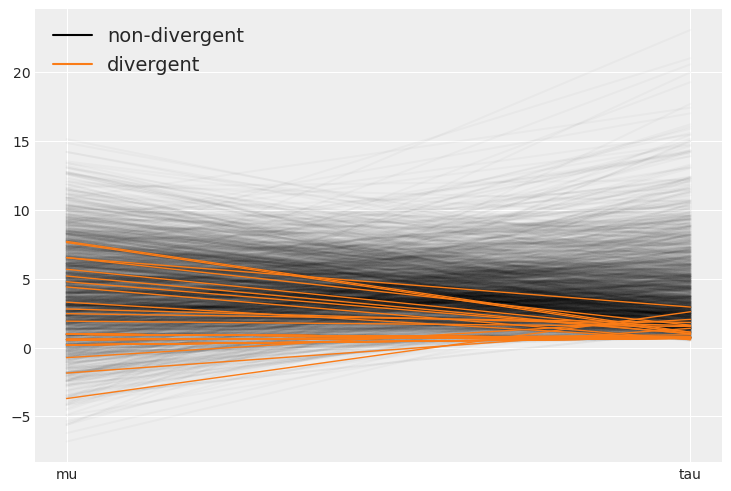

In [22]:
az.plot_parallel(centered, var_names=["mu", "tau"]);

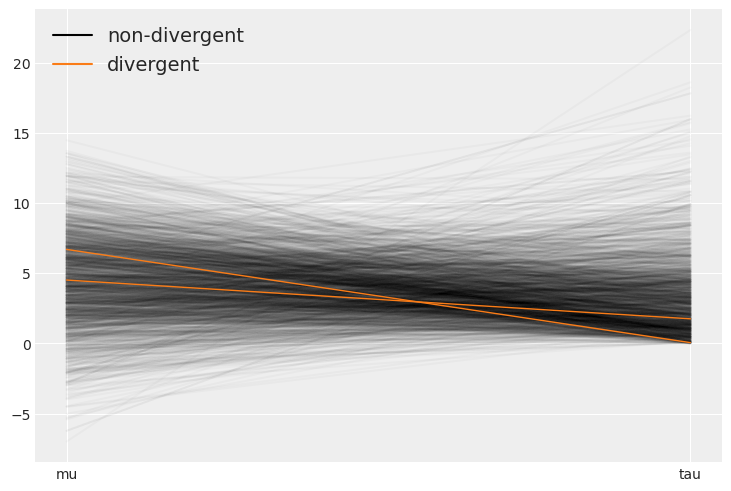

In [23]:
az.plot_parallel(non_centered, var_names=["mu", "tau"]);

### 2E6 

In the GitHub repository we have included an InferenceData object with a Poisson model and one with a NegativeBinomial, both models are fitted to the same dataset. Use `az.load_arviz_data(.)` to load them, and then use ArviZ functions to answer the following questions:

a. Which model provides a better fit to the data? Use the functions `az.compare(.)` and `az.plot_compare(.)`

b. Explain why one model provides a better fit than the other. Use `az.plot_ppc(.)` and `az.plot_loo(.)`

c. Compare both models in terms of their pointwise ELPD values. Identify the 5 observations with the largest (absolute) difference. Which model is predicting them better? For which model `p_loo` is closer to the actual number of parameters? Could you explain why? Hint: the Poisson model has a single parameter that controls both the variance and mean. Instead, the NegativeBinomial has two parameters.

d. Diagnose LOO using the values. Is there any reason to be concerned about the accuracy of LOO for this particular case?

#### Inference data generation
This code is what we've used to generate the InferenceData objects in Github. The part that is hidden from students is that `Poisson.nc` is generated from a model where the data generating distribution matches the likelihood, so it will be a better fit, than `InfData2.nc` where the data generating process does not match the likelihood.

In [24]:
observed_data = stats.nbinom(5.3, 0.35).rvs(110, random_state=rng)
observed_data

array([11, 14, 13, 13, 12, 10,  6,  7, 13, 12, 12, 13,  9,  5,  9, 17,  6,
        5,  6,  6,  2, 12,  9,  4,  6, 10,  8, 22,  8, 18,  6, 11,  7,  5,
       13, 16,  6, 10,  8,  3,  5, 17,  9,  5,  5, 10, 19,  8, 10, 10,  9,
        7,  3,  4, 12, 17, 10,  5,  8,  2, 18,  2,  9, 18, 25,  7, 10,  2,
        6,  7, 15, 21, 10, 11,  4,  5,  8, 10, 14,  6,  4,  3, 15,  8,  7,
       23,  2,  2,  7,  5, 10,  8, 20, 12, 10, 14, 11,  6, 14,  4,  6,  8,
       11, 11,  4,  5, 17,  4,  0, 13])

In [25]:
with pm.Model() as poisson_model:
    lam = pm.HalfNormal("lam", 20)
    y = pm.Poisson("y", lam, observed=observed_data)
    
    poisson_inf_data = pm.sample(return_inferencedata=True, random_seed=0)
    poisson_inf_data.add_groups({"posterior_predictive": {"y":pm.sample_posterior_predictive(poisson_inf_data,random_seed=0)["y"][None,:]}})

poisson_inf_data.to_netcdf("pois_idata.nc")

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lam]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


'pois_idata.nc'

In [26]:
with pm.Model() as negative_model:
    alpha = pm.HalfNormal("alpha", 20)
    mu = pm.HalfNormal("mu", 20)

    y = pm.NegativeBinomial("y", mu, alpha, observed=observed_data)
    
    negative_binom_inf_data = pm.sample(return_inferencedata=True, random_seed=0)
    negative_binom_inf_data.add_groups({"posterior_predictive": {"y":pm.sample_posterior_predictive(negative_binom_inf_data,random_seed=0)["y"][None,:]}})
    
negative_binom_inf_data.to_netcdf("neg_idata.nc")

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


'neg_idata.nc'

#### Solution a

The NegativeBinomial model has a better fit as indicated by the ELPD

In [27]:
pois_idata = az.from_netcdf("pois_idata.nc")
neg_idata = az.from_netcdf("neg_idata.nc")

In [28]:
compare = az.compare({"Poisson":pois_idata, "NegativeBinomial":neg_idata})
compare

/u/32/martino5/unix/anaconda3/envs/pymcv3/lib/python3.9/site-packages/arviz/stats/stats.py:145: UserWarning: The default method used to estimate the weights for each model,has changed from BB-pseudo-BMA to stacking
  warnings.warn(


,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
NegativeBinomial,0,-329.677447,2.021825,0.000000,1.0,7.629971,0.000000,False,log
Poisson,1,-368.983801,2.747281,39.306354,0.0,18.629018,11.574633,False,log


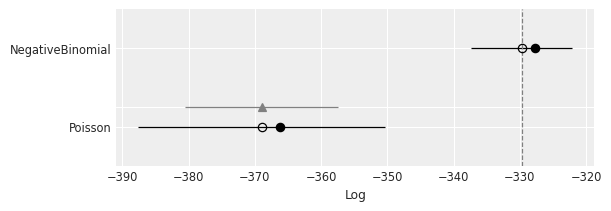

In [29]:
az.plot_compare(compare);

#### Solution b

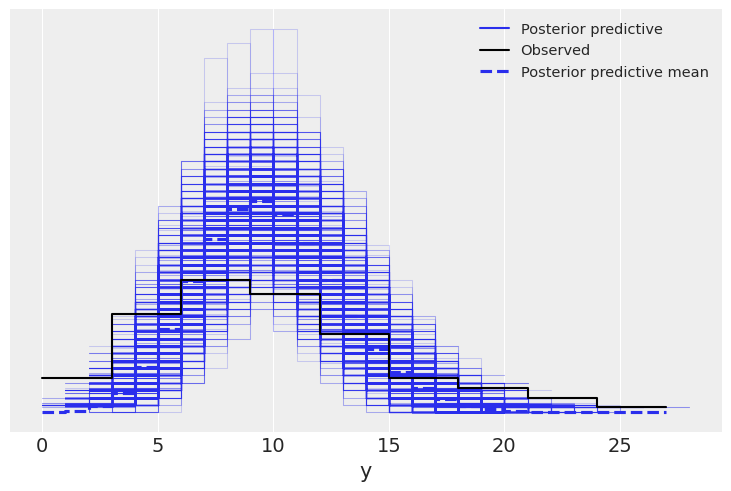

In [30]:
az.plot_ppc(pois_idata);

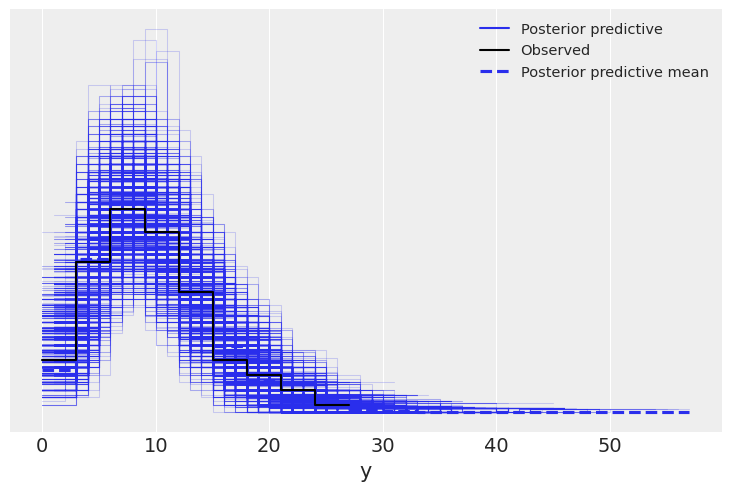

In [31]:
az.plot_ppc(neg_idata);

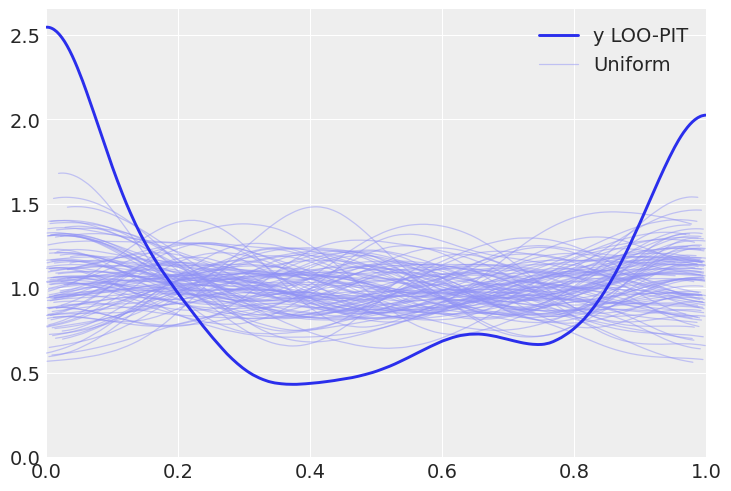

In [32]:
az.plot_loo_pit(pois_idata, y="y");

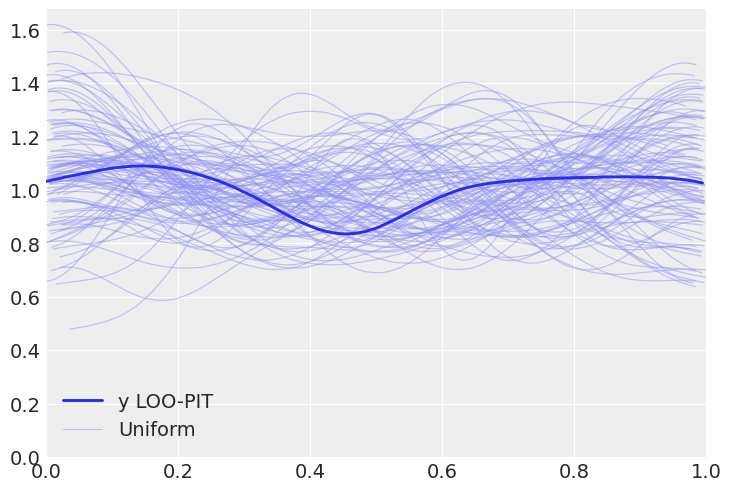

In [33]:
az.plot_loo_pit(neg_idata, y="y");

#### Solution c

In [34]:
pois_elpddata = az.loo(pois_idata, pointwise=True)
pois_elpddata

Computed from 4000 by 110 log-likelihood matrix

         Estimate       SE
elpd_loo  -368.98    18.63
p_loo        2.75        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)      110  100.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%

In [35]:
neg_elpddata = az.loo(neg_idata, pointwise=True)
neg_elpddata

Computed from 4000 by 110 log-likelihood matrix

         Estimate       SE
elpd_loo  -329.68     7.63
p_loo        2.02        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)      110  100.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%

In [36]:
diff = pois_elpddata.loo_i - neg_elpddata.loo_i
max5_absdiff = np.abs(diff).argsort()[-5:]

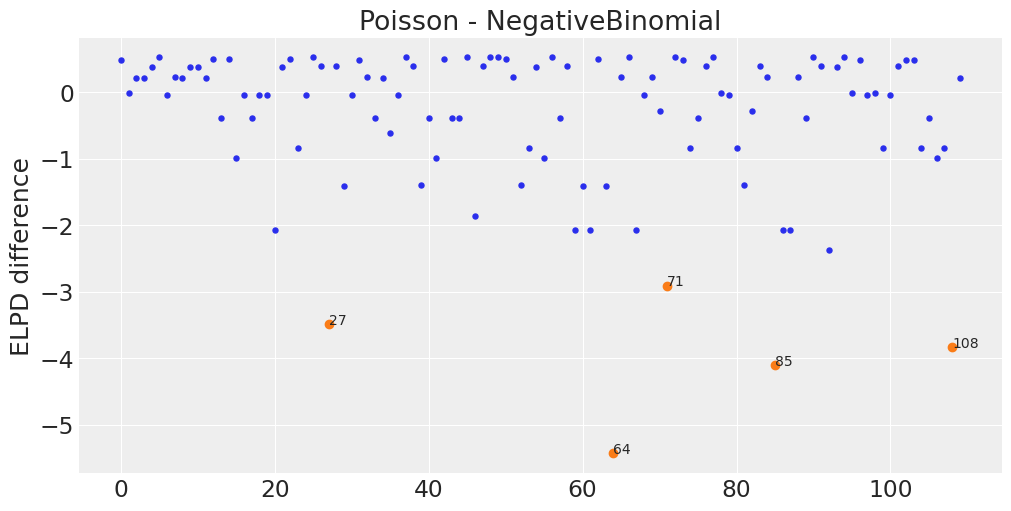

In [37]:
az.plot_elpd({"Poisson":pois_elpddata, "NegativeBinomial":neg_elpddata}, figsize=(10, 5),
             plot_kwargs={"marker":"."});
plt.plot(max5_absdiff.values, diff[max5_absdiff.values], "C1o");
for x, y in zip(max5_absdiff.values, diff[max5_absdiff.values].values):
    plt.text(x, y, x)

### 2E7

Reproduce Fig. 2.7, but using `az.plot_loo_pit(ecdf=True)` in place of `az.plot_bpv(.)`. Interpret the results. Hint: when using the option `ecdf=True`, instead of the LOO-PIT KDE you will get a plot of the difference between the LOO-PIT Empirical Cumulative Distribution Function (ECDF) and the Uniform CDF. The ideal plot will be one with a difference of zero.



arviz - WARNING - Shape validation failed: input_shape: (1, 1), minimum_shape: (chains=1, draws=4)


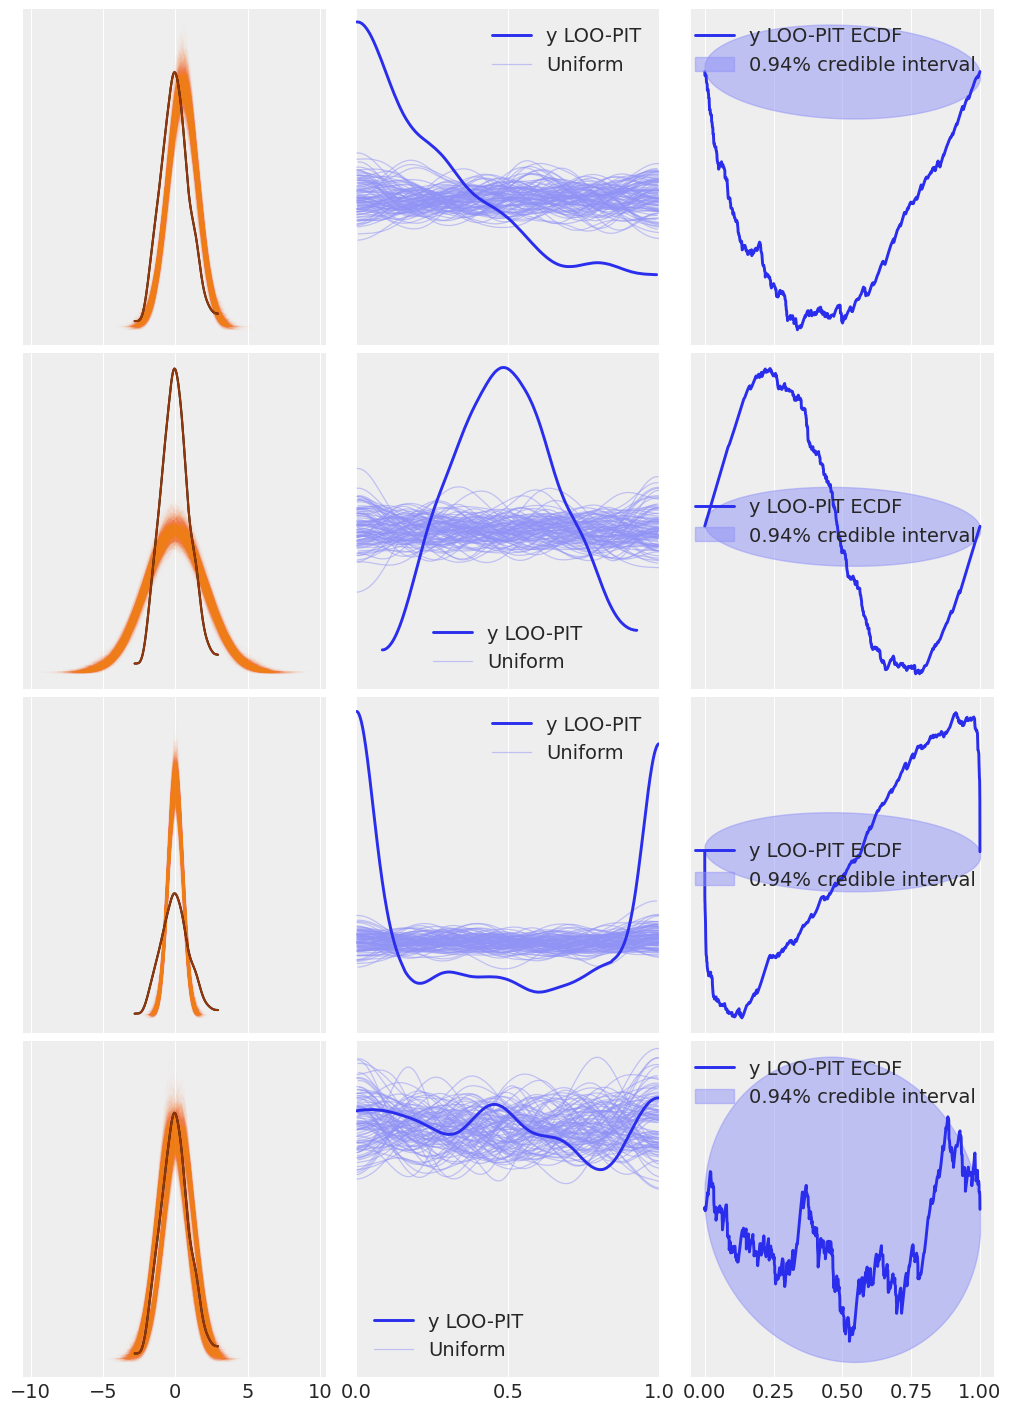

In [38]:
n_obs = 500
samples = 2000
y_obs = np.random.normal(0, 1, size=n_obs)
apu = 0.025 # arbitrary posterior uncertainty

pp_samples = np.random.normal(0.5, 1, size=(1, samples, n_obs))
log_likelihood = [stats.norm(np.random.normal(0.5, apu),
                  np.random.normal(1, apu)).logpdf(y_obs) 
                  for i in range(samples)]
log_likelihood = np.array(log_likelihood)[None,:,:]
idata1 = az.from_dict(posterior_predictive={"y":pp_samples},
                      posterior={"a":0}, # dummy posterior, loo_pit gets the number of chains from the posterior
                      log_likelihood={"y":log_likelihood},
                      observed_data={"y":y_obs})

pp_samples = np.random.normal(0, 2, size=(1, samples, n_obs))
log_likelihood = [stats.norm(np.random.normal(0, apu),
                  np.random.normal(2, apu)).logpdf(y_obs) 
                  for i in range(samples)]
log_likelihood = np.array(log_likelihood)[None,:,:]
idata2 = az.from_dict(posterior_predictive={"y":pp_samples},
                      posterior={"a":0}, # dummy posterior, loo_pit gets the number of chains from the posterior
                      log_likelihood={"y":log_likelihood},
                      observed_data={"y":y_obs})

pp_samples = np.random.normal(0, 0.5, size=(1, samples, n_obs))
log_likelihood = [stats.norm(np.random.normal(0, apu),
                  np.random.normal(0.5, apu)).logpdf(y_obs) 
                  for i in range(samples)]
log_likelihood = np.array(log_likelihood)[None,:,:]
idata3 = az.from_dict(posterior_predictive={"y":pp_samples},
                      posterior={"a":0}, # dummy posterior, loo_pit gets the number of chains from the posterior
                      log_likelihood={"y":log_likelihood},
                      observed_data={"y":y_obs})


pp_samples = np.concatenate([np.random.normal(-0.25, 1, size=(1, samples//2, n_obs)),
                             np.random.normal(0.25, 1, size=(1, samples//2, n_obs))],
                            axis=1)
                                                            

log_likelihood0 = [stats.norm(np.random.normal(-0.25, apu),
                   np.random.normal(1, apu)).logpdf(y_obs) 
                   for i in range(samples//2)]
log_likelihood1 = [stats.norm(np.random.normal(0.25, apu),
                   np.random.normal(1, apu)).logpdf(y_obs) 
                   for i in range(samples//2)]
log_likelihood = np.array(np.concatenate([log_likelihood0, log_likelihood1]))[None,:,:]
idata4 = az.from_dict(posterior_predictive={"y":pp_samples},
                      posterior={"a":0}, # dummy posterior, loo_pit gets the number of chains from the posterior
                      log_likelihood={"y":log_likelihood},
                      observed_data={"y":y_obs})

idatas = [idata1,
          idata2,
          idata3,
          idata4,
]

_, axes = plt.subplots(len(idatas), 3, figsize=(10, 14), sharex="col")

for idata, ax in zip(idatas, axes):
    az.plot_ppc(idata, ax=ax[0], color="C1", alpha=0.01, mean=False, legend=False)
    az.plot_kde(idata.observed_data["y"], ax=ax[0], plot_kwargs={"color":"C4", "zorder":3})                         
    ax[0].set_xlabel("")
    az.plot_loo_pit(idata, y="y", ax=ax[1])
    ax[1].set_yticks([])
    ax[1].set_xticks([0., 0.5, 1.])
    az.plot_loo_pit(idata, y="y", ecdf=True, ax=ax[2])
    ax[2].set_yticks([])

### 2E8
MCMC posterior estimation techniques need convergence diagnostics because MCMC is an approximate method to estimate the posterior. MCMC can fail in many ways, in particular being sensitive to the posterior geometry or starting point. Each of the convergence diagnostics assess a different potential failure mode of MCMC and strive to provide information on whether these failure modes occurred.

Conjugate methods do not need convergence diagnostics because there is no idea of convergence to the true posterior. Conjugate methods calcuate the posterior exactly, there is no approximation of the posterior but the exact posterior itself.

### 2E9
An example may be energy plots. Reading the documentation states `This may help to diagnose poor exploration by gradient-based algorithms like Hamiltonian Monte Carlo methods.` 

https://arviz-devs.github.io/arviz/api/generated/arviz.plot_energy.html

### 2E10
This is an open ended questionm thus we just provide example of possible explanations.

#### Prior Selection
Visualizations examples are `az.plot_dist` or `az.plot_posterior` (which spite of the name, works also for other distributions than the posterior). Both of these plots show the shape of the prior distributions, and in the case of `az.plot_posterior`, some statistics like the mean and HDI are included. Numerical quantities can include statistics such as the mean or standard deviation.

#### MCMC Sampling
Visualizations here can be trace plots or rank plots to assess convergence. Similarly $\hat R$ and ESS can help to assess convergence and effectiveness of MCMC samples

#### Posterior Predictions
Plot PPC shows the observed values against the PPC which assess the ability of the model to make future estimates. Numerical diagnostics for posterior predictive estimates could include HDI which assess the highest density interval for future observations. 

### 2M11
We want to model a football league with $N$ teams. As usual, we start with a simpler version of the model in mind, just a single team. We assume the scores are Poisson distributed according to a scoring rate . We choose the prior $\text{Gamma}(0.5, 0.00001)$ because this is sometimes recommend as an “objective” prior.


1. Generate and plot the prior predictive distribution. How reasonable it looks to you?

2. Use your knowledge of sports in order to refine the prior choice.

3. Instead of soccer you now want to model basketball. Could you come with a reasonable prior for that instance? Define the prior in a model and generate a prior predictive distribution to validate your intuition. Hint: You can parameterize the Gamma distribution using the rate and shape parameters as in Code Block poisson_football or alternatively using the mean and standard deviation.


In [39]:
with pm.Model() as model:
    μ = pm.Gamma("μ", 0.5, 0.00001)
    score = pm.Poisson("score", μ)
    
    prior_predictive = pm.sample_prior_predictive()
    trace = pm.sample_prior_predictive()

This prior predictive does not seem terribly realistic when plotted. The prior shows that 100k goal/points are possible when in football 10 would be considered a high scoring game

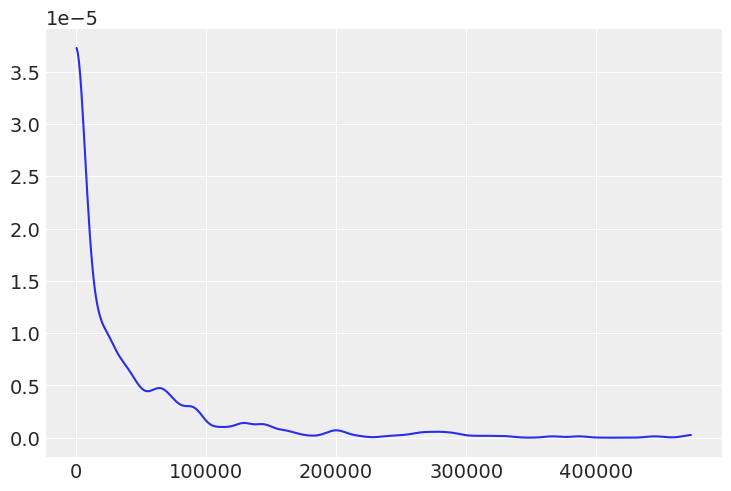

In [40]:
az.plot_dist(prior_predictive["μ"]);

In [41]:
prior_predictive["μ"].mean()

49341.3131151386

We can change the mean and standard deviation of the prior to obtain this much more reasonable distribution

In [42]:
with pm.Model() as model:
    μ = pm.Gamma("μ", mu=3, sd=2)
    score = pm.Poisson("score", μ)
    
    prior_predictive = pm.sample_prior_predictive()
    trace = pm.sample_prior_predictive()

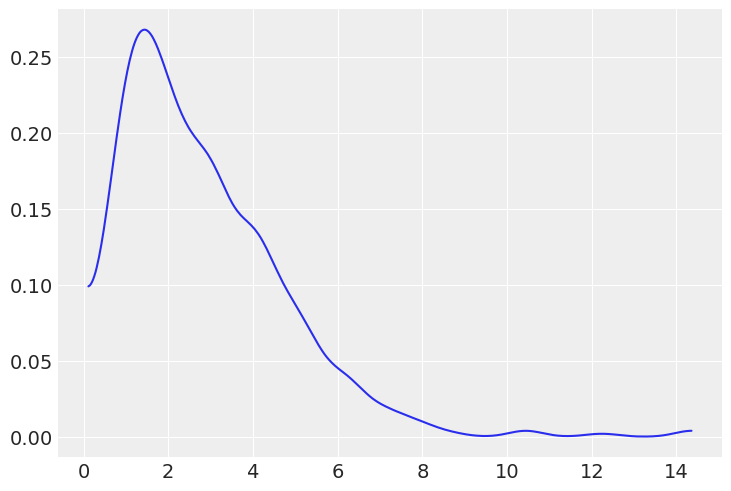

In [43]:
az.plot_dist(prior_predictive["μ"]);

If we create a prior for basketball we could choose a different mu and sd to reflect the scores we'd expect from that sports game

In [44]:
with pm.Model() as model:
    μ = pm.Gamma("μ", mu=70, sd=30)
    score = pm.Poisson("score", μ)
    
    prior_predictive = pm.sample_prior_predictive()
    trace = pm.sample_prior_predictive()

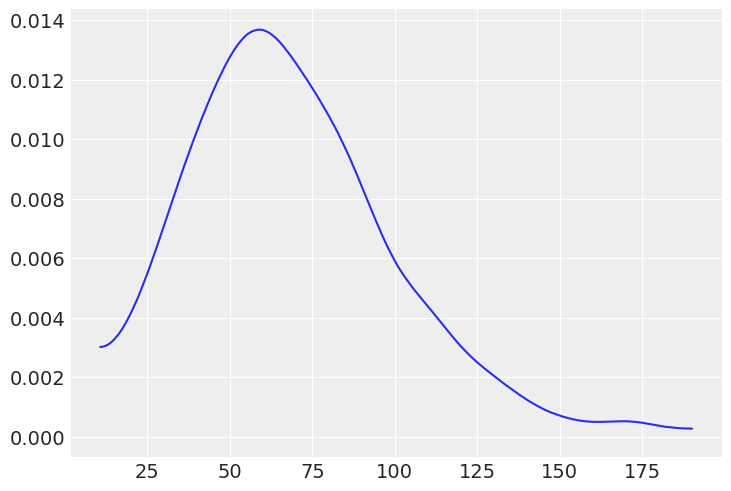

In [45]:
az.plot_dist(prior_predictive["μ"]);

### 2M12
In Code Block 1.3 from Chapter 1, change the value of `can_sd` and run the Metropolis sampler. Try values like 0.2 and 1.


(a)  Use ArviZ to compare the sampled values using diagnostics such as the autocorrelation plot, trace plot and the ESS. Explain the observed differences.

(b)  Modify Code Block 1.3 so you get more than one independent chain. Use ArviZ to compute rank plots and $\hat R$.

#### Solution A

In [46]:
θ_true = 0.7
rng = np.random.default_rng(2021)
Y = stats.bernoulli(θ_true).rvs(20, random_state=rng)

In [47]:
def post(θ, Y, α=1, β=1):
    if 0 <= θ <= 1:
        prior = stats.beta(α, β).pdf(θ)
        like  = stats.bernoulli(θ).pmf(Y).prod()
        prop = like * prior
    else:
        prop = -np.inf
    return prop


In [48]:
def sampler(can_sd):
    n_iters = 1000
    α = β =  1
    θ = 0.5 

    trace = {'θ':np.zeros(n_iters)}
    p2 = post(θ, Y, α, β)

    for iter in range(n_iters):
        θ_can = stats.norm(θ, can_sd).rvs(1)
        p1 = post(θ_can, Y, α, β)  
        pa = p1 / p2

        if pa > stats.uniform(0, 1).rvs(1):
            θ = θ_can
            p2 = p1

        trace['θ'][iter] = θ
    return trace

trace_02 = sampler(.02)
trace_1 = sampler(1)

Below we have the trace plot, ess, and autocorrelation plot. Changing the parameter `can_sd` changes the distribution of step size of the sampler which can be seen in each of the plots below.  
a) In the trace plot for `can_sd=.02` the stepped size is more "jagged" as each time the candidate value of $\theta$ changes, its only by a little. In the trace plot for `can_sd=1` the steps are more pronounced with the sampler taking a larger step each time  
b) In the ESS calculation for `can_sd=.02` the samples are much more correlated versus the `can_sd=1`. The larger step size induces less autocorrelation than the smaller sample size.  
c) Plot C confirms the results of the ESS calculation. With smaller step sizes the correlation of samples is higher as the value of the current step won't be much different than the upcoming step.

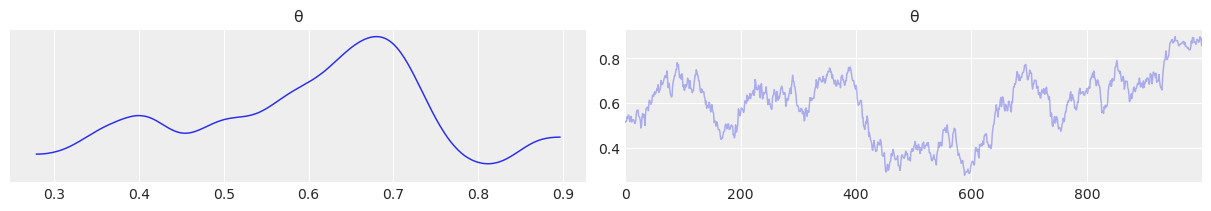

In [49]:
az.plot_trace(trace_02);

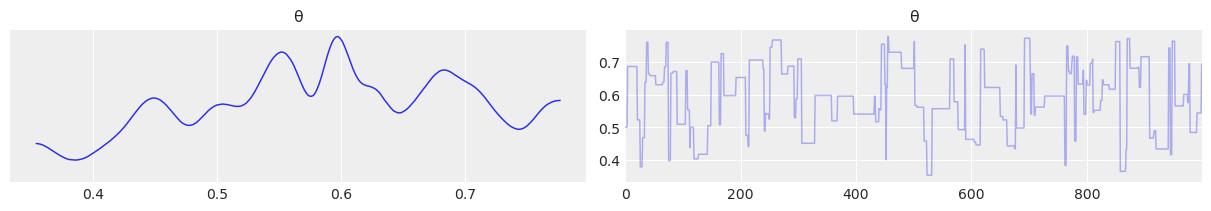

In [50]:
az.plot_trace(trace_1);

In [51]:
az.ess(trace_02), az.ess(trace_1)

(<xarray.Dataset>
 Dimensions:  ()
 Data variables:
     θ        float64 13.43,
 <xarray.Dataset>
 Dimensions:  ()
 Data variables:
     θ        float64 71.21)

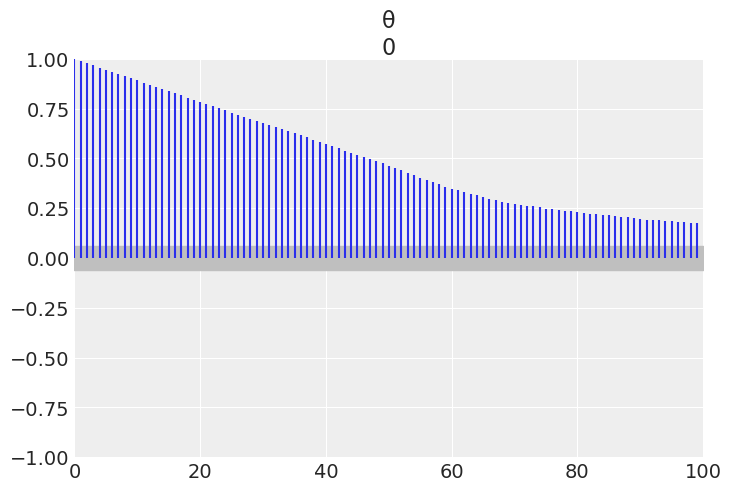

In [52]:
az.plot_autocorr(trace_02);

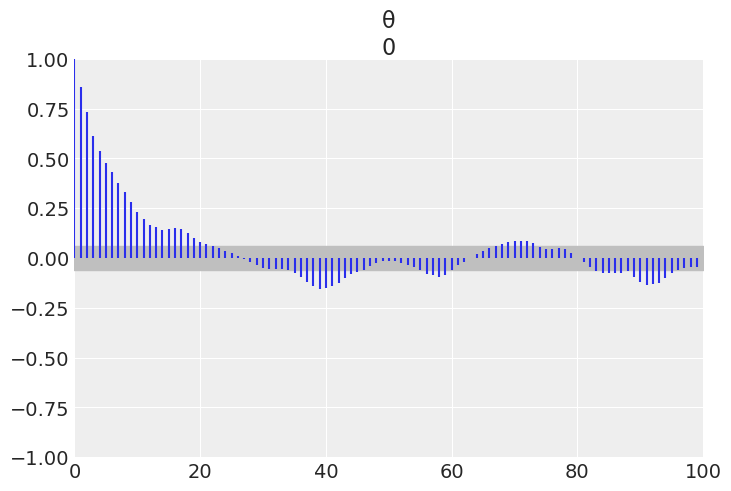

In [53]:
az.plot_autocorr(trace_1);

### 2M13

Generate a random sample using `np.random.binomial(n=1, p=0.5, size=200)` and fit it using a
Beta-Binomial model.

Use `pm.sample(., step=pm.Metropolis())` (Metropolis-Hastings sampler) and `pm.sample(.)` (the standard sampler). Compare the results in terms of the ESS, $\hat R$, autocorrelation, trace plots and rank plots.
Reading the PyMC3 logging statements what sampler is autoassigned? What is your conclusion about this sampler performance compared to Metropolis-Hastings?

#### Metropolis Hastings Model

In [54]:
with pm.Model() as betabinom:
    θ = pm.Beta("θ", 1,1)
    y = pm.Binomial("y", p=θ, n=1, observed = Y)
    trace = pm.sample( step=pm.Metropolis())

<ipython-input-54-8e3b93d28c90>:4: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample( step=pm.Metropolis())
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [θ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


In [55]:
az.summary(trace)

/u/32/martino5/unix/anaconda3/envs/pymcv3/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
θ,0.593,0.098,0.414,0.772,0.004,0.003,774.0,1197.0,1.01


/u/32/martino5/unix/anaconda3/envs/pymcv3/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


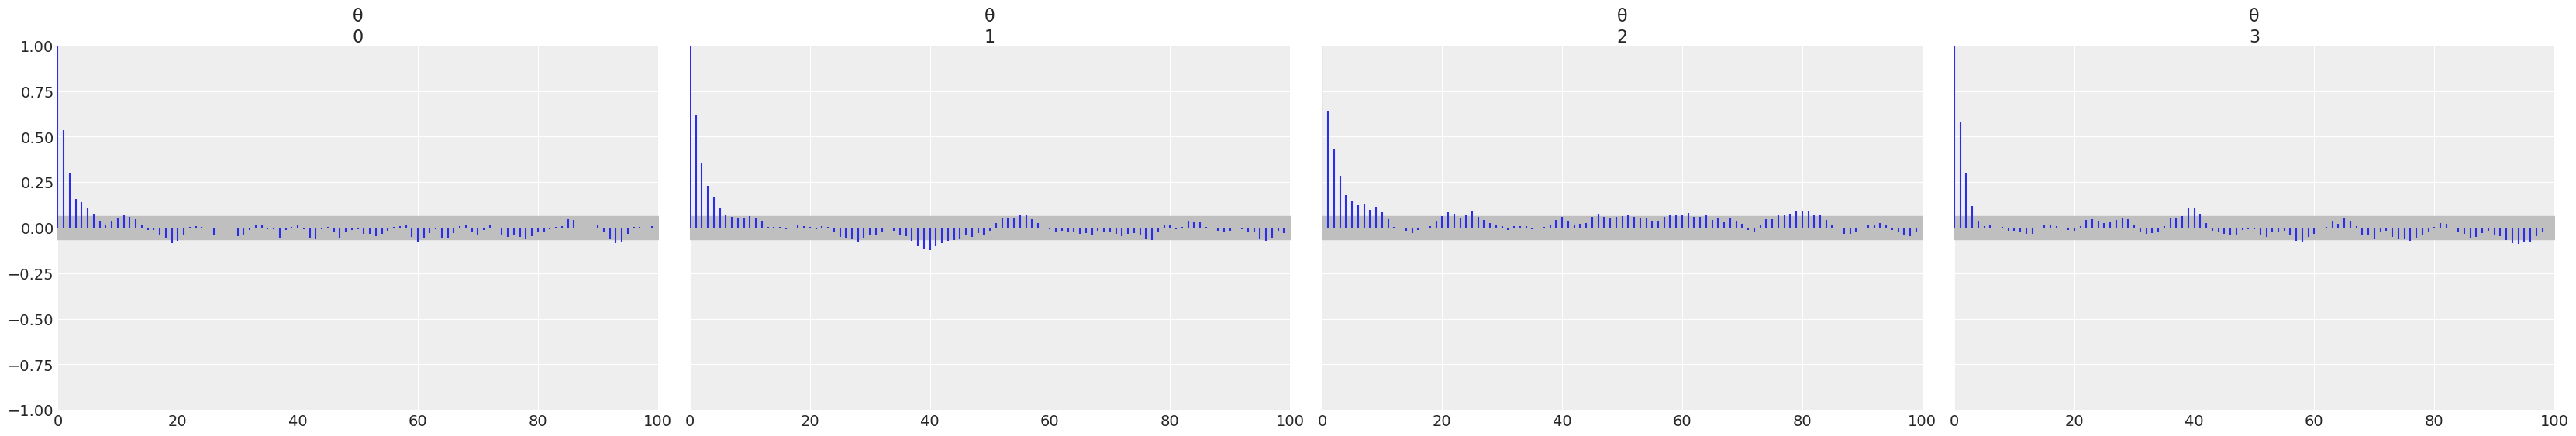

In [56]:
az.plot_autocorr(trace);

/u/32/martino5/unix/anaconda3/envs/pymcv3/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


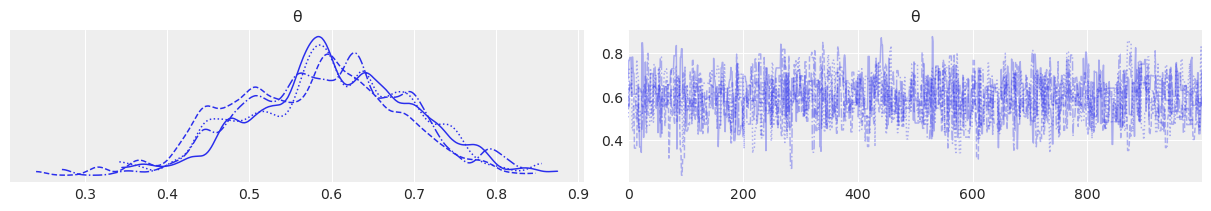

In [57]:
az.plot_trace(trace);

/u/32/martino5/unix/anaconda3/envs/pymcv3/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


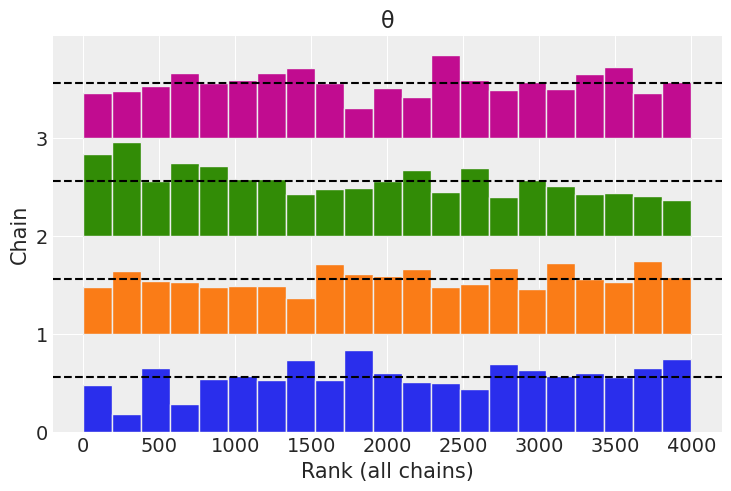

In [58]:
az.plot_rank(trace);

#### Default Sampler (HMC)

In [59]:
with pm.Model() as betabinom:
    θ = pm.Beta("θ", 1,1)
    y = pm.Binomial("y", p=θ, n=1, observed = Y)
    trace = pm.sample()

<ipython-input-59-bae42eb2b82e>:4: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


In [60]:
az.summary(trace)

/u/32/martino5/unix/anaconda3/envs/pymcv3/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
θ,0.592,0.102,0.406,0.785,0.002,0.002,1834.0,2693.0,1.0


/u/32/martino5/unix/anaconda3/envs/pymcv3/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


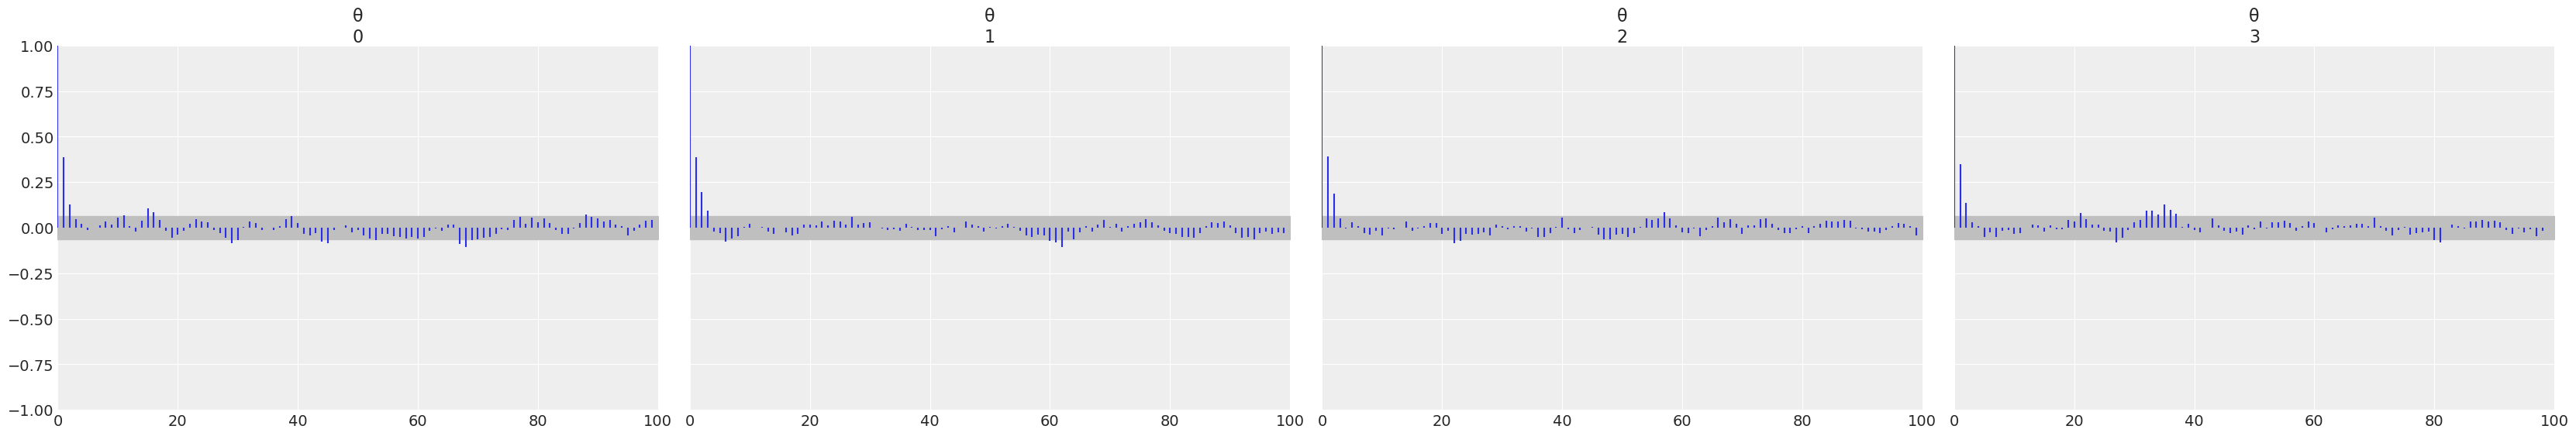

In [61]:
az.plot_autocorr(trace);

/u/32/martino5/unix/anaconda3/envs/pymcv3/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


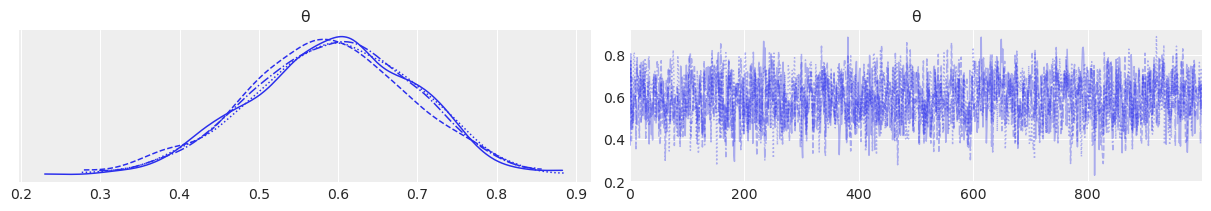

In [62]:
az.plot_trace(trace);

/u/32/martino5/unix/anaconda3/envs/pymcv3/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


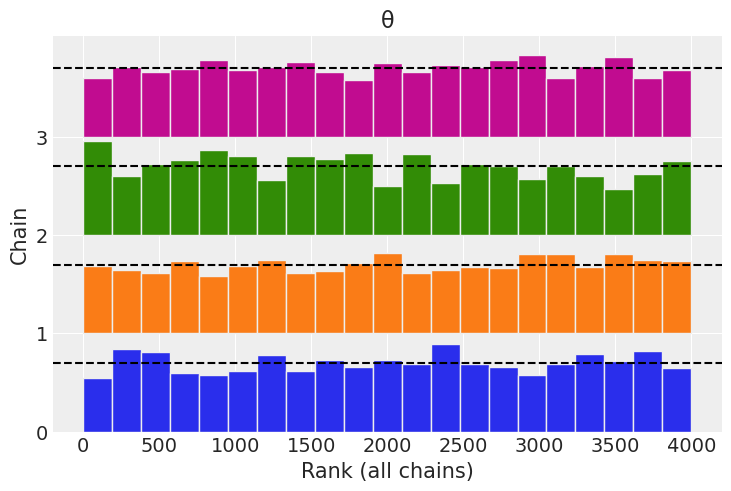

In [63]:
az.plot_rank(trace);

### 2M14

Generate your own example of a synthetic
posterior with convergence issues, let us call it `bad_chains3`.

a.  Explain why the synthetic posterior you generated is "bad\". What
    about it would we not want to see in an actual modeling scenario?

b.  Run the same diagnostics we run in the book for `bad_chains0` and
    `bad_chains1`. Compare your results with those in the book and
    explain the differences and similarities.

c.  Did the results of the diagnostics from the previous point made you
    reconsider why `bad_chains3` is a "bad chain\"?

Let us generate two types of bad chains. The first is a chain that linearly gets larger. The second is a chain that that is just a sin wave generated from the first trace. Neither of these chains are randomly samping any space, and the values they are producing are not from the same underlying function.

In [64]:
num_samples = 1000
bad_chain_3a = np.arange(num_samples)
bad_chain_3b = np.sin(bad_chain_3a)

chains = np.vstack([bad_chain_3a, bad_chain_3b])
chains.shape

(2, 1000)

Plotting a number of diagnostics we can get a sense of the issues. In a rank plot we get a sense that if we sort the samples across plot chains, and then plot their rank, that the sample from the linearly growing chain are all larger than the values from the sin wave, hences hte lack of uniformity,

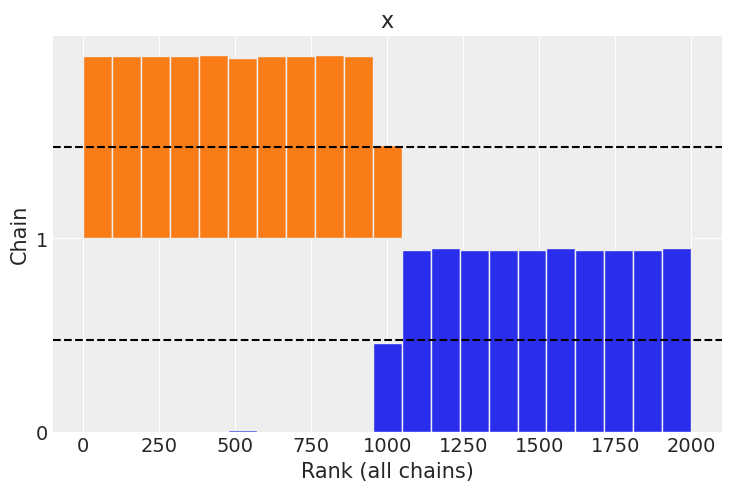

In [65]:
az.plot_rank(chains);

The autocorrelation plot is similar in that for the linearly growing chain the linear autocorrelation is present throughout the chain, versus in the sinusoidal chain the there is a regular recurring linear autocorrelation.

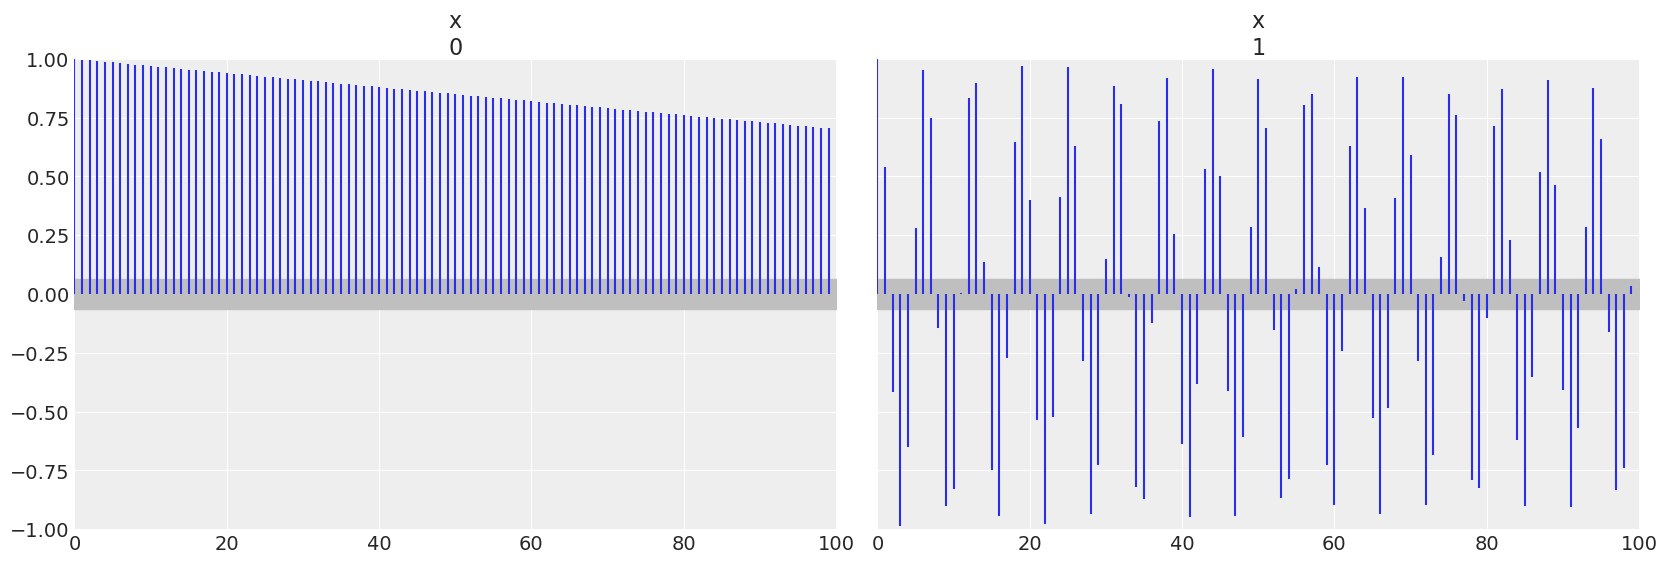

In [66]:
az.plot_autocorr(chains);

Rhat also confirms the variance of these two sets of values is not similar to each other.

In [67]:
az.rhat(chains)

2.2272918677093814

### 2M15 

Generate a random sample using `np.random.binomial(n=1, p=0.5, size=200)` and fit it using a Beta-Binomial model.

a.  Check that LOO-PIT is approximately Uniform.

b.  Tweak the prior to make the model a bad fit and get a LOO-PIT that
    is low for values closer to zero and high for values closer to one.
    Justify your prior choice.

c.  Tweak the prior to make the model a bad fit and get a LOO-PIT that
    is high for values closer to zero and low for values closer to one.
    Justify your prior choice.

d.  Tweak the prior to make the model a bad fit and get a LOO-PIT that
    is high for values close to 0.5 and low for values closer to zero
    and one. Could you do it? Explain why.

In [68]:
Y = np.random.binomial(n=1, p=0.5, size=200)
Y

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0])

In [69]:
with pm.Model() as betabinom:
    θ = pm.Beta("θ", 1,1)
    y = pm.Binomial("y", p=θ, n=1, observed = Y)
    trace = pm.sample()
    posterior_predictive = pm.sample_posterior_predictive(trace)
    inf_data = az.from_pymc3(trace=trace, posterior_predictive=posterior_predictive)

<ipython-input-69-0c047e0004e5>:4: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


#### Solution A

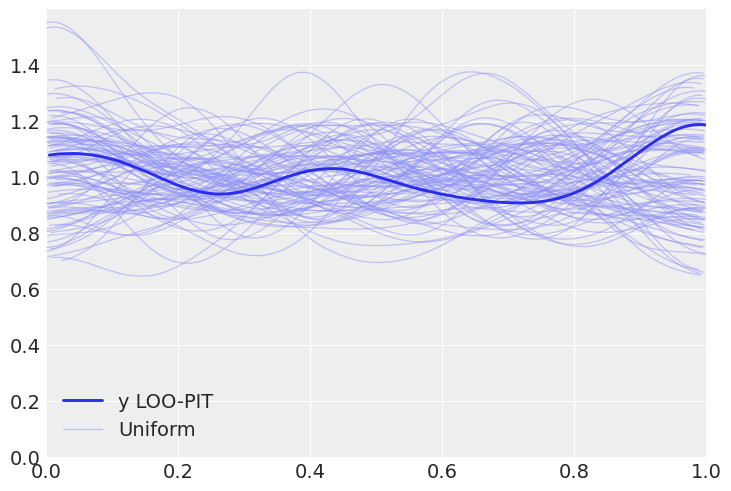

In [70]:
az.plot_loo_pit(inf_data, y="y");

#### Solution B
The justification is easier with with plotting the prior. With the prior below we are indicating that were expecting

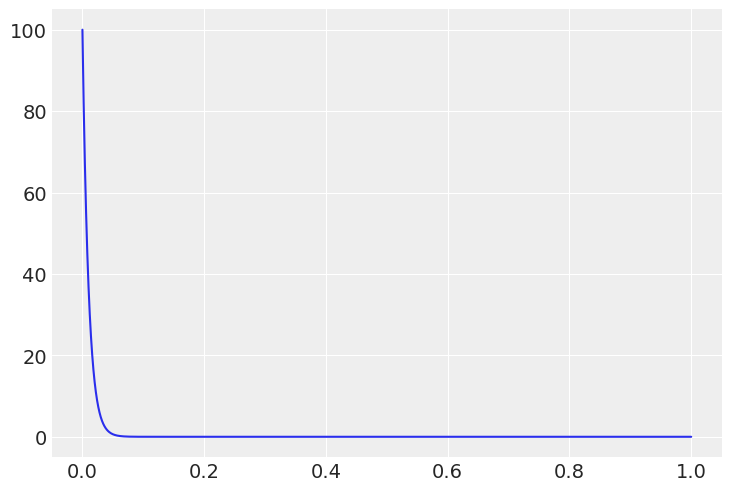

In [71]:
x = np.linspace(0,1,999)
θ = stats.beta(1, 100).pdf(x)
plt.plot(x, θ);

<ipython-input-72-5afcaa064613>:4: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


<AxesSubplot:>

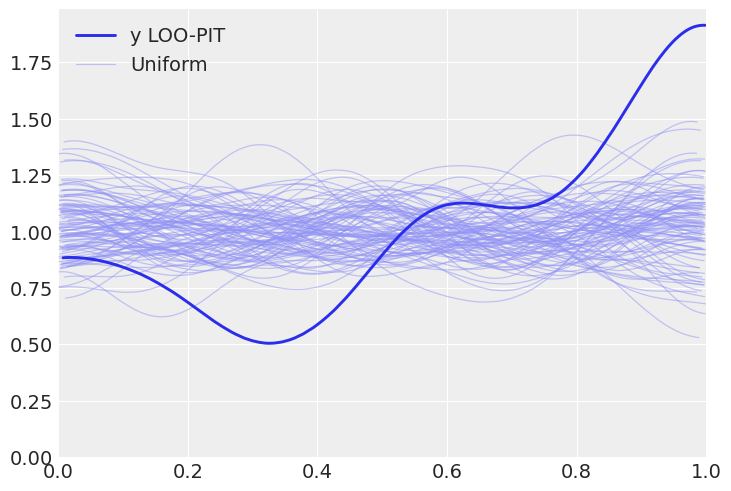

In [72]:
with pm.Model() as betabinom:
    θ = pm.Beta("θ", 1, 100)
    y = pm.Binomial("y", p=θ, n=1, observed = Y)
    trace = pm.sample()
    posterior_predictive = pm.sample_posterior_predictive(trace)
    inf_data = az.from_pymc3(trace=trace, posterior_predictive=posterior_predictive)
    
az.plot_loo_pit(inf_data, y="y")

#### Solution C

<ipython-input-73-63ac115a1361>:4: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


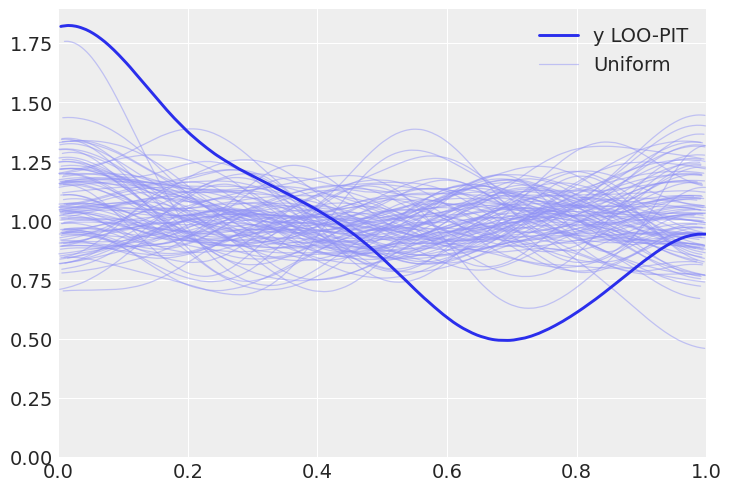

In [73]:
with pm.Model() as betabinom:
    θ = pm.Beta("θ", 100, 1)
    y = pm.Binomial("y", p=θ, n=1, observed = Y)
    trace = pm.sample()
    posterior_predictive = pm.sample_posterior_predictive(trace)
    inf_data = az.from_pymc3(trace=trace, posterior_predictive=posterior_predictive)
    
az.plot_loo_pit(inf_data, y="y");

#### Solution D

With a Beta-binomial model we only can have more 0s than expected or more 1s than expected. Is not possible to have more/less "bulk" values than expected or more/less "tail" values than expected

### 2H16

Use PyMC3 to write a model with Normal likelihood. Use the following random samples as data and the following priors for the mean. Fix the standard deviation parameter in the likelihood at 1.

a.  A random sample of size 200 from a $\mathcal{N}(0,1)$ and prior
    distribution $\mathcal{N}(0,20)$

b.  A random sample of size 2 from a $\mathcal{N}(0,1)$ and prior
    distribution $\mathcal{N}(0,20)$

c.  A random sample of size 200 from a $\mathcal{N}(0,1)$ and prior
    distribution $\mathcal{N}(20, 1)$

d.  A random sample of size 200 from a $\mathcal{U}(0,1)$ and prior
    distribution $\mathcal{N}(10, 20)$

e.  A random sample of size 200 from a $\mathcal{HN}(0,1)$ and a prior
    distribution $\mathcal{N}(10,20)$

Assess convergence by running the same diagnostics we run in the book
for `bad_chains0` and `bad_chains1`. Compare your results with those in
the book and explain the differences and similarities. 

Note: This exercise is still unfinished. Models are defined but convergence assessment is missing. Feel free to contribute a solution by sending a PR.

#### Solution A

In [74]:
y = stats.norm(0, 1).rvs(200)

with pm.Model() as model_2h16a:
    mu = pm.Normal("mu", 0, 20)
    y = pm.Normal("y", mu, 1, observed=y)

#### Solution B

In [75]:
y = stats.norm(0, 1).rvs(2)

with pm.Model() as model_2h16b:
    mu = pm.Normal("mu", 0, 20)
    y = pm.Normal("y", mu, 1, observed=y)

#### Solution C

In [76]:
y = stats.norm(0,1).rvs(200)

with pm.Model() as model_2h16b:
    mu = pm.Normal("mu", 20, 1)
    y = pm.Normal("y", mu, 1, observed=y)

#### Solution D

In [77]:
y = stats.uniform(0,1).rvs(200)

with pm.Model() as model_2h16c:
    mu = pm.Normal("mu", 10, 20)
    y = pm.Normal("y", mu, 1, observed=y)

#### Solution E

In [78]:
y = stats.halfnorm(0,1).rvs(200)

with pm.Model() as model_2h16d:
    mu = pm.Normal("mu", 10,20)
    y = pm.Normal("y", mu, 1, observed=y)

### 2H17
Each of the four sections in this chapter, prior predictive checks, posterior predictive checks,  numerical  inference  diagnostics,  and  model  comparison,  detail  a  specific  step  in the Bayesian workflow. In your own words explain what the purpose of each step is, and conversely what is lacking if the step is omitted. What does each tell us about our statistical models?

*prior predictive checks*: Assseses a couple of things. One is if our model is specified at least correctly enough to sample in the absence of data. Another is check the match or mismatch with our domain knowledge. If we omit prior predictive checks we may not understand how our choices of prior map to the domain of the observed data.

*Posterior Predictive Checks*: After our model is conditioned on data, what the future observations may look like. Posterior predictive checks also help us assess the fit of our model against the observed data, and highlight issues as a whole or in particular regions of the observed space. If we omit posterior predictive checks may not understand how the conditioned parameter distributions map to the domain of the observed data.

*Numerical Inference Diagnostics*: After we perform sampling we need to check if our sampler was successful. Posterior sampling is error prone and not guaranteed to converge to a correct or usable posterior estimate. If we skip this step any inferences we make may be completely wrong, perhaps because our sampler failed, our model was mispecified, or our data was faulty in some manner. 

*Model Comparison*: Model comparison is useful any time we have more than one model, is a situation that should occur often. A model itsellf is not a fact but an assumption, and by comparing two models it can yield insights into the strengths and weaknesses of each one. Model comparison can tell us which models are able to make better estimates of the data, which ones complexity are not justified by their predictive performance.